# Rashmi

In [1]:
import os
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output

# For each image, input a number for whether the image is indoors/outdoors
## 0 = indoors
## 1 = outdoors

In [2]:
path = "."

###From: https://towardsdatascience.com/label-your-images-easily-using-this-jupyter-notebook-code-4102037b7821



labels = []
path = path + '/'
val_for = ['jpg', 'jpeg', 'png']
valid_img_list = os.listdir(path)
valid_img_list = [i for i in valid_img_list if i.split('.')[-1] in val_for]

print("Total File:", len(valid_img_list))


Total File: 2500


Image # 2499


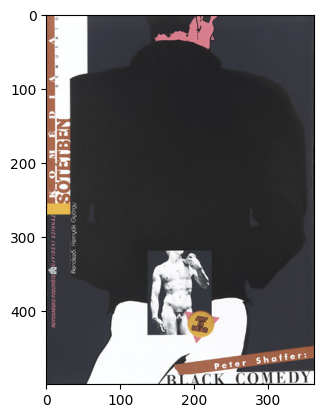

0


In [5]:
start = 1740
pre_save = start
labels = []
batch_size = 20
img_list = valid_img_list[start:]
print(len(img_list))
for idx, i in zip(range(len(img_list)),img_list):
    print("Image #", start+idx)
    im = Image.open(path + i)
    plt.imshow(im)
    plt.show()
    inp = input()
    labels.append(int(inp))
    clear_output(wait=True)
    
    if(idx>0 and idx%batch_size==0):
        print(pre_save, pre_save+len(labels), len(labels), len(img_list))
        data = {'Image':valid_img_list[pre_save:pre_save+len(labels)], 'Label':labels}
        print(data)
        df = pd.DataFrame(data)
        df.to_csv(f"{path}/labels-{pre_save//batch_size}.csv") 
        print("Saved output #", pre_save//batch_size)
        labels = []
        pre_save = start+idx+1

if len(labels)>0:
    data = {'Image':valid_img_list[pre_save:pre_save+len(labels)], 'Label':labels}
    df = pd.DataFrame(data)
    df.to_csv(f"{path}/labels-last.csv") 



In [6]:
import glob
files = glob.glob('./*.csv')
files.sort(key=os.path.getmtime)
files

['./labels-1.csv',
 './labels-2.csv',
 './labels-3.csv',
 './labels-4.csv',
 './labels-5.csv',
 './labels-6.csv',
 './labels-7.csv',
 './labels-8.csv',
 './labels-9.csv',
 './labels-10.csv',
 './labels-11.csv',
 './labels-12.csv',
 './labels-13.csv',
 './labels-14.csv',
 './labels-15.csv',
 './labels-16.csv',
 './labels-17.csv',
 './labels-18.csv',
 './labels-19.csv',
 './labels-20.csv',
 './labels-21.csv',
 './labels-22.csv',
 './labels-23.csv',
 './labels-24.csv',
 './labels-74.csv',
 './labels-25.csv',
 './labels-26.csv',
 './labels-27.csv',
 './labels-75.csv',
 './labels-28.csv',
 './labels-76.csv',
 './labels-29.csv',
 './labels-77.csv',
 './labels-30.csv',
 './labels-78.csv',
 './labels-31.csv',
 './labels-79.csv',
 './labels-32.csv',
 './labels-80.csv',
 './labels-33.csv',
 './labels-34.csv',
 './labels-81.csv',
 './labels-35.csv',
 './labels-82.csv',
 './labels-36.csv',
 './labels-83.csv',
 './labels-37.csv',
 './labels-84.csv',
 './labels-38.csv',
 './labels-85.csv',
 './label

In [11]:

# importing libraries
import pandas as pd
import glob
import os
  
# A list of all joined files is returned
files = glob.glob('./*.csv')
files.sort(key=os.path.getmtime)

# Finally, the files are joined
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

      Unnamed: 0           Image  Label
0              0  1444139556.jpg      1
1              1  4589729844.jpg      0
2              2   117582730.jpg      1
3              3  4539373592.jpg      1
4              4  4579692883.jpg      0
...          ...             ...    ...
2518          34  1025846258.jpg      1
2519          35  1203022306.jpg      0
2520          36  4642713944.jpg      1
2521          37  1477699001.jpg      1
2522          38  4558996296.jpg      1

[2523 rows x 3 columns]


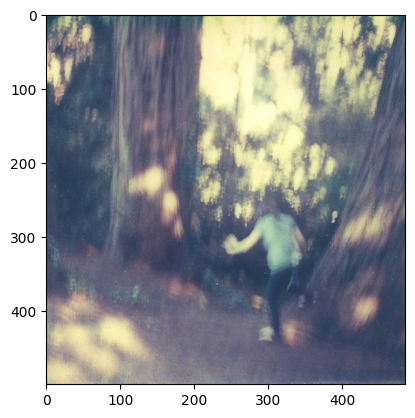

1


In [10]:
labels=[]
pending_files = list(set(valid_img_list)-set(df.Image))
for i in pending_files:
    im = Image.open(path + i)
    plt.imshow(im)
    plt.show()
    inp = input()
    labels.append(int(inp))
    clear_output(wait=True)
    
data = {'Image':pending_files, 'Label':labels}
df = pd.DataFrame(data)
df.to_csv(f"{path}/labels-missing.csv") 